In [1]:
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
s.isnull().sum()

1

In [9]:
dates = pd.date_range("20230801", periods=6)  # 날짜 범위 설정방법
dates

DatetimeIndex(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
               '2023-08-05', '2023-08-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2023-08-01,-1.056037,-1.805402,-1.403116,0.596369
2023-08-02,0.222075,-0.511272,0.951325,-0.066203
2023-08-03,-0.219207,0.890976,0.071881,-2.325203
2023-08-04,-0.483127,1.482486,-1.106968,0.104813
2023-08-05,-0.332895,-1.034390,0.674528,-1.610098
2023-08-06,-1.082368,-0.110432,0.163371,0.978219


### 사전형 -> 데이터 프레임

In [12]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20230802"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo"
    }
)
df2

,A,B,C,D,E,F
0,1.0,2023-08-02,1.0,3,test,foo
1,1.0,2023-08-02,1.0,3,train,foo
2,1.0,2023-08-02,1.0,3,test,foo
3,1.0,2023-08-02,1.0,3,train,foo


In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [23]:
df2.index

Index([0, 1, 2, 3], dtype='int64')

In [24]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [25]:
df.to_numpy()

array([[-1.05603715, -1.80540208, -1.40311594,  0.59636942],
       [ 0.22207486, -0.51127188,  0.95132536, -0.06620273],
       [-0.219207  ,  0.89097604,  0.07188055, -2.32520323],
       [-0.48312658,  1.48248609, -1.1069684 ,  0.10481266],
       [-0.33289469, -1.0343901 ,  0.67452772, -1.61009831],
       [-1.08236759, -0.11043156,  0.16337097,  0.97821908]])

In [26]:
df2.to_numpy()

array([[1.0, Timestamp('2023-08-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-08-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2023-08-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-08-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [27]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.491926,-0.181339,-0.108163,-0.387017
std,0.505249,1.216333,0.950345,1.298324
min,-1.082368,-1.805402,-1.403116,-2.325203
25%,-0.912810,-0.903611,-0.812256,-1.224124
50%,-0.408011,-0.310852,0.117626,0.019305
75%,-0.247629,0.640624,0.546739,0.473480
max,0.222075,1.482486,0.951325,0.978219


In [29]:
df

,A,B,C,D
2023-08-01,-1.056037,-1.805402,-1.403116,0.596369
2023-08-02,0.222075,-0.511272,0.951325,-0.066203
2023-08-03,-0.219207,0.890976,0.071881,-2.325203
2023-08-04,-0.483127,1.482486,-1.106968,0.104813
2023-08-05,-0.332895,-1.034390,0.674528,-1.610098
2023-08-06,-1.082368,-0.110432,0.163371,0.978219


In [28]:
df.T

,2023-08-01,2023-08-02,2023-08-03,2023-08-04,2023-08-05,2023-08-06
A,-1.056037,0.222075,-0.219207,-0.483127,-0.332895,-1.082368
B,-1.805402,-0.511272,0.890976,1.482486,-1.034390,-0.110432
C,-1.403116,0.951325,0.071881,-1.106968,0.674528,0.163371
D,0.596369,-0.066203,-2.325203,0.104813,-1.610098,0.978219


In [30]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2023-08-01,0.596369,-1.403116,-1.805402,-1.056037
2023-08-02,-0.066203,0.951325,-0.511272,0.222075
2023-08-03,-2.325203,0.071881,0.890976,-0.219207
2023-08-04,0.104813,-1.106968,1.482486,-0.483127
2023-08-05,-1.610098,0.674528,-1.034390,-0.332895
2023-08-06,0.978219,0.163371,-0.110432,-1.082368


In [32]:
df.sort_values(by='B') # B열 기준으로 내림차순 정렬

,A,B,C,D
2023-08-01,-1.056037,-1.805402,-1.403116,0.596369
2023-08-05,-0.332895,-1.034390,0.674528,-1.610098
2023-08-02,0.222075,-0.511272,0.951325,-0.066203
2023-08-06,-1.082368,-0.110432,0.163371,0.978219
2023-08-03,-0.219207,0.890976,0.071881,-2.325203
2023-08-04,-0.483127,1.482486,-1.106968,0.104813


In [35]:
print(df['A'].nunique())
df['A'].unique()

6


array([-1.05603715,  0.22207486, -0.219207  , -0.48312658, -0.33289469,
       -1.08236759])

In [36]:
df.loc[:, ['C','D']]

,C,D
2023-08-01,-1.403116,0.596369
2023-08-02,0.951325,-0.066203
2023-08-03,0.071881,-2.325203
2023-08-04,-1.106968,0.104813
2023-08-05,0.674528,-1.610098
2023-08-06,0.163371,0.978219


In [38]:
df.iloc[0:3, [0,2]]

,A,C
2023-08-01,-1.056037,-1.403116
2023-08-02,0.222075,0.951325
2023-08-03,-0.219207,0.071881


In [41]:
df["2023-08-02":"2023-08-05"]

,A,B,C,D
2023-08-02,0.222075,-0.511272,0.951325,-0.066203
2023-08-03,-0.219207,0.890976,0.071881,-2.325203
2023-08-04,-0.483127,1.482486,-1.106968,0.104813
2023-08-05,-0.332895,-1.034390,0.674528,-1.610098


In [43]:
import matplotlib.pyplot as plt
df

,A,B,C,D
2023-08-01,-1.056037,-1.805402,-1.403116,0.596369
2023-08-02,0.222075,-0.511272,0.951325,-0.066203
2023-08-03,-0.219207,0.890976,0.071881,-2.325203
2023-08-04,-0.483127,1.482486,-1.106968,0.104813
2023-08-05,-0.332895,-1.034390,0.674528,-1.610098
2023-08-06,-1.082368,-0.110432,0.163371,0.978219


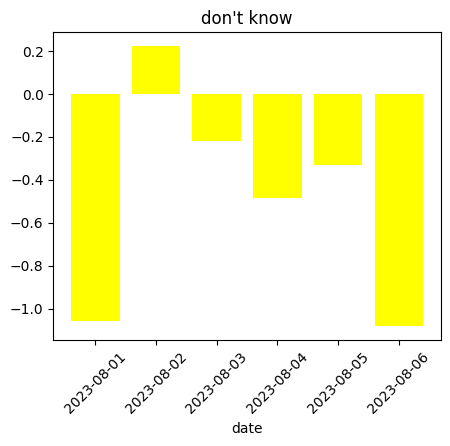

In [66]:
plt.figure(figsize=(5,4))
plt.title("don't know")
plt.bar(df.index, df["A"],color = "yellow")
plt.xlabel("date")
plt.xticks(rotation=45)
plt.show()

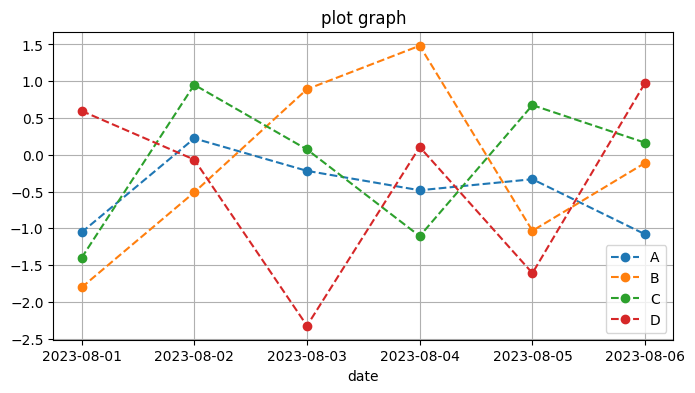

In [60]:
from seaborn._core.properties import LineStyle
plt.figure(figsize=(8, 4))
x = df.columns
for i in x:
    data = df[i]
    plt.plot(data, label=str(i), linestyle="--", marker="o")
plt.title("plot graph")
plt.xlabel("date")
plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='B', ylabel='A'>

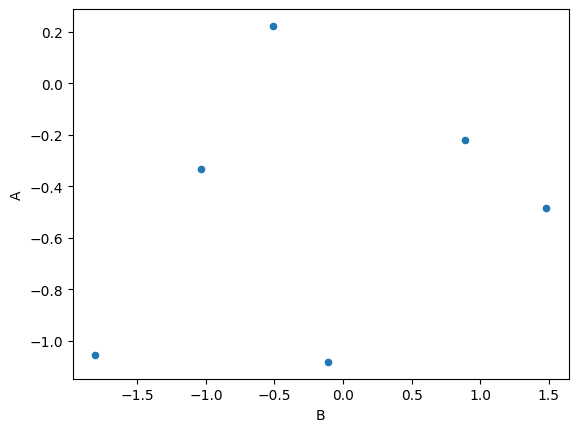

In [62]:
df.plot(kind='scatter', x='B', y='A')

In [70]:
df[df["A"] > 0]

,A,B,C,D
2023-08-02,0.222075,-0.511272,0.951325,-0.066203


In [71]:
df[df["B"] == df["B"].max()]

,A,B,C,D
2023-08-04,-0.483127,1.482486,-1.106968,0.104813


In [72]:
df[df["C"] == df["C"].min()]

,A,B,C,D
2023-08-01,-1.056037,-1.805402,-1.403116,0.596369


In [73]:
df.sum()

A   -2.951558
B   -1.088033
C   -0.648980
D   -2.322103
dtype: float64

In [76]:
df.groupby("A").mean()

,B,C,D
A,,,
-1.082368,-0.110432,0.163371,0.978219
-1.056037,-1.805402,-1.403116,0.596369
-0.483127,1.482486,-1.106968,0.104813
-0.332895,-1.034390,0.674528,-1.610098
-0.219207,0.890976,0.071881,-2.325203
0.222075,-0.511272,0.951325,-0.066203
